## Imports

In [3]:
import pandas as pd
%matplotlib inline
import pylab as plt
import numpy as np
from scipy.stats import ttest_ind

## Question we are answering

Are boys taller than girls on an average at age X?
X can be 2 years, 9 years and 18 years old

## Load the data

In [4]:
df = pd.read_csv('./children_heights.txt', sep='\t')

In [5]:
df

,Boys_2,Boys_9,Boys_18,Girls_2,Girls_9,Girls_18
0,90.2,139.4,179.0,83.8,136.5,169.6
1,91.4,144.3,195.1,86.2,137.0,166.8
2,86.4,136.5,183.7,85.1,129.0,157.1
3,87.6,135.4,178.7,88.6,139.4,181.1
4,86.7,128.9,171.5,83.0,125.6,158.4
5,88.1,136.0,181.8,88.9,137.1,165.6
6,82.2,128.5,172.5,89.7,133.6,166.7
7,83.8,133.2,174.6,81.3,121.4,156.5
8,91.0,145.6,190.4,88.7,133.6,168.1
9,87.4,132.4,173.8,88.4,134.1,165.3


In [6]:
df.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Boys_2,Boys_9,Boys_18,Girls_2,Girls_9,Girls_18
count,26.000000,26.000000,26.000000,32.000000,32.000000,32.000000
mean,88.400000,136.546154,180.038462,87.465625,135.275000,166.765625
std,3.035918,5.316031,6.396191,3.506548,5.686884,6.371540
min,81.300000,125.400000,169.400000,80.900000,121.400000,153.600000
25%,NaN,NaN,NaN,85.850000,133.175000,163.525000
50%,NaN,NaN,NaN,87.850000,136.300000,167.000000
75%,NaN,NaN,NaN,89.325000,139.400000,170.300000
max,92.200000,146.000000,195.100000,94.000000,144.800000,181.100000


## Plot histograms of heights for boys and girls

In [7]:
def plot_hist(df, columns):
    df[columns].hist(color='r', alpha=0.3, normed=False)

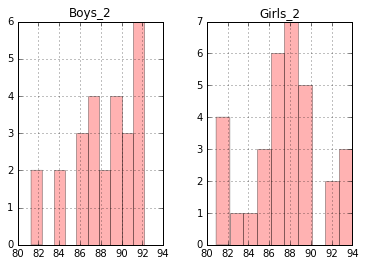

In [8]:
plot_hist(df,['Boys_2', 'Girls_2'])

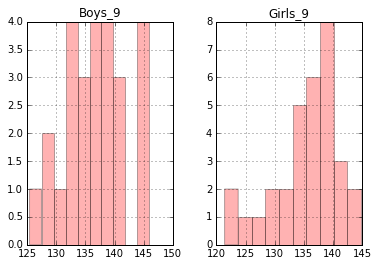

In [6]:
plot_hist(df,['Boys_9', 'Girls_9'])

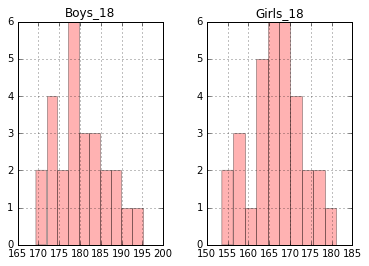

In [7]:
plot_hist(df, ['Boys_18', 'Girls_18'])

## Summary statistics for the data

In [8]:
df.describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Boys_2,Boys_9,Boys_18,Girls_2,Girls_9,Girls_18
count,26.000000,26.000000,26.000000,32.000000,32.000000,32.000000
mean,88.400000,136.546154,180.038462,87.465625,135.275000,166.765625
std,3.035918,5.316031,6.396191,3.506548,5.686884,6.371540
min,81.300000,125.400000,169.400000,80.900000,121.400000,153.600000
25%,NaN,NaN,NaN,85.850000,133.175000,163.525000
50%,NaN,NaN,NaN,87.850000,136.300000,167.000000
75%,NaN,NaN,NaN,89.325000,139.400000,170.300000
max,92.200000,146.000000,195.100000,94.000000,144.800000,181.100000


In [9]:
def plot_probs(df, boy_col, girl_col):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    boy_values = df[boy_col].values
    boy_values = boy_values[~np.isnan(boy_values)]
    weights = np.ones_like(boy_values)/len(boy_values)
    _ = ax.hist(boy_values, alpha=0.3, label=['Boys'], weights=weights)
    girl_values = df[girl_col].values
    girl_values = girl_values[~np.isnan(girl_values)]
    weights = np.ones_like(girl_values)/len(girl_values)
    _ = ax.hist(girl_values, color='red', alpha=.3, label='Girls', weights=weights)
    ax.set_xlabel('Height(cm)', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.vlines(np.mean(boy_values), 0.0, ax.get_ylim()[1], colors='b', linestyle='--', linewidth=4)
    ax.vlines(np.mean(girl_values), 0.0, ax.get_ylim()[1], colors='r', linestyle='--', linewidth=4)
    ax.legend()
    print "Result", ttest_ind(boy_values, girl_values)

Result Ttest_indResult(statistic=1.0708580982445333, pvalue=0.28882695040683509)


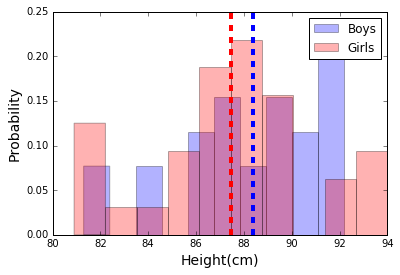

In [10]:
plot_probs(df, 'Boys_2', 'Girls_2')

Result Ttest_indResult(statistic=0.87148628022315633, pvalue=0.38720967132857143)


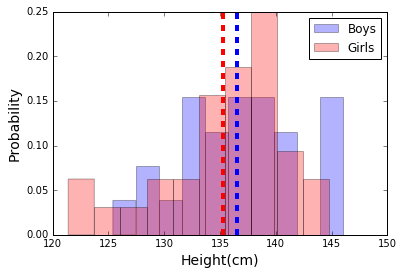

In [11]:
plot_probs(df, 'Boys_9', 'Girls_9')

Result Ttest_indResult(statistic=7.8761998332333256, pvalue=1.2361838873133691e-10)


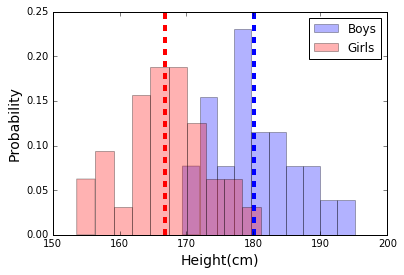

In [11]:
plot_probs(df, 'Boys_18', 'Girls_18')

Observe that although there are differences in heights of girls and boys at age 2, 9 no significant differences are found on an average. However at 18 years of age, on an average boys are taller than girls and this difference is statistically significant at level 0.05 